# 필수 라이브러리 로딩

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

# 한글 폰트 설정
mpl.rc('font', family = 'D2coding')
# 유니코드에서 음수 부호 설정
mpl.rc('axes', unicode_minus = False)

#차트 스타일 설정
sns.set(font = "D2coding", rc = {"axes.unicode_minus": False}, style = 'darkgrid')
plt.rc("figure", figsize = (10,8))

warnings.filterwarnings('ignore')

# 데이터 로딩

In [3]:
data = pd.read_csv('C:/k_digital/source/data/spam.csv')

In [4]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data.loc[data['target'] == 'spam', ]

,target,text
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5539,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5542,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5549,spam,Had your contract mobile 11 Mnths? Latest Moto...
5568,spam,REMINDER FROM O2: To get 2.50 pounds free call...


# 탐색적 데이터 분석 : EDA

## target : 목표변수 or 종속변수

In [6]:
data['target'].unique()

array(['ham', 'spam'], dtype=object)

- spam : 스팸 문자, ham : 스팸이 아닌 문자
- NLTK(Netural Language Toolkit) : 자연어 처리를 위해 만든 도구(패키지)
- 주요기능 : 말뭉치, 토큰 생성, 형태소 분석, 품사 태깅

## 말뭉치(corpus)

- 자연어 분석을 위해 만든 샘플 문서 집합

In [7]:
import nltk

In [8]:
import nltk
nltk.download('book')
from nltk.book import *

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     C:\Users\admin\AppData\R

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [9]:
# gutenberg 말뭉치 : 저작권이 만료된 소설같은 작품들을 가지고 있는 문서집합
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [10]:
emma = nltk.corpus.gutenberg.raw('austen-emma.txt')
print(emma[:1000])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

In [11]:
bible = nltk.corpus.gutenberg.raw('bible-kjv.txt')
print(bible[:1000])

[The King James Bible]

The Old Testament of the King James Bible

The First Book of Moses:  Called Genesis


1:1 In the beginning God created the heaven and the earth.

1:2 And the earth was without form, and void; and darkness was upon
the face of the deep. And the Spirit of God moved upon the face of the
waters.

1:3 And God said, Let there be light: and there was light.

1:4 And God saw the light, that it was good: and God divided the light
from the darkness.

1:5 And God called the light Day, and the darkness he called Night.
And the evening and the morning were the first day.

1:6 And God said, Let there be a firmament in the midst of the waters,
and let it divide the waters from the waters.

1:7 And God made the firmament, and divided the waters which were
under the firmament from the waters which were above the firmament:
and it was so.

1:8 And God called the firmament Heaven. And the evening and the
morning were the second day.

1:9 And God said, Let the waters under the heav

In [12]:
shakespeare = nltk.corpus.gutenberg.raw('shakespeare-hamlet.txt')
print(shakespeare[:1000])

[The Tragedie of Hamlet by William Shakespeare 1599]


Actus Primus. Scoena Prima.

Enter Barnardo and Francisco two Centinels.

  Barnardo. Who's there?
  Fran. Nay answer me: Stand & vnfold
your selfe

   Bar. Long liue the King

   Fran. Barnardo?
  Bar. He

   Fran. You come most carefully vpon your houre

   Bar. 'Tis now strook twelue, get thee to bed Francisco

   Fran. For this releefe much thankes: 'Tis bitter cold,
And I am sicke at heart

   Barn. Haue you had quiet Guard?
  Fran. Not a Mouse stirring

   Barn. Well, goodnight. If you do meet Horatio and
Marcellus, the Riuals of my Watch, bid them make hast.
Enter Horatio and Marcellus.

  Fran. I thinke I heare them. Stand: who's there?
  Hor. Friends to this ground

   Mar. And Leige-men to the Dane

   Fran. Giue you good night

   Mar. O farwel honest Soldier, who hath relieu'd you?
  Fra. Barnardo ha's my place: giue you goodnight.

Exit Fran.

  Mar. Holla Barnardo

   Bar. Say, what is Horatio there?
  Hor. A peece of

## 토큰 생성 : 문자열을 가장 작은 다위인 토큰으로 나누는 작업

In [13]:
>>> import nltk
>>> nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
from nltk.tokenize import sent_tokenize
print(sent_tokenize(shakespeare[:1000]))

['[The Tragedie of Hamlet by William Shakespeare 1599]\n\n\nActus Primus.', 'Scoena Prima.', 'Enter Barnardo and Francisco two Centinels.', 'Barnardo.', "Who's there?", 'Fran.', 'Nay answer me: Stand & vnfold\nyour selfe\n\n   Bar.', 'Long liue the King\n\n   Fran.', 'Barnardo?', 'Bar.', 'He\n\n   Fran.', 'You come most carefully vpon your houre\n\n   Bar.', "'Tis now strook twelue, get thee to bed Francisco\n\n   Fran.", "For this releefe much thankes: 'Tis bitter cold,\nAnd I am sicke at heart\n\n   Barn.", 'Haue you had quiet Guard?', 'Fran.', 'Not a Mouse stirring\n\n   Barn.', 'Well, goodnight.', 'If you do meet Horatio and\nMarcellus, the Riuals of my Watch, bid them make hast.', 'Enter Horatio and Marcellus.', 'Fran.', 'I thinke I heare them.', "Stand: who's there?", 'Hor.', 'Friends to this ground\n\n   Mar.', 'And Leige-men to the Dane\n\n   Fran.', 'Giue you good night\n\n   Mar.', "O farwel honest Soldier, who hath relieu'd you?", 'Fra.', "Barnardo ha's my place: giue you go

In [15]:
from nltk.tokenize import word_tokenize
print(word_tokenize(shakespeare[50:100]))

['9', ']', 'Actus', 'Primus', '.', 'Scoena', 'Prima', '.', 'Enter', 'Barnardo', 'a']


In [16]:
>>> import nltk
>>> nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
from nltk.tokenize import RegexpTokenizer
# \w : 영문자, 숫자, _(밑줄) ### '+'를 붙이면 단어단위!
re = RegexpTokenizer('[\w]+')
re.tokenize(shakespeare[50:100])

['9', 'Actus', 'Primus', 'Scoena', 'Prima', 'Enter', 'Barnardo', 'a']

- [자주 사용하는 문자 클래스]
- [0-9] 또는 [a-zA-Z] 등은 무척 자주 사용하는 정규 표현식이다. 이렇게 자주 사용하는 정규식은 별도의 표기법으로 표현할 수 있다. 다음을 기억해 두자.

- \d - 숫자와 매치, [0-9]와 동일한 표현식이다.
- \D - 숫자가 아닌 것과 매치, [^0-9]와 동일한 표현식이다.
- \s - whitespace 문자와 매치, [ \t\n\r\f\v]와 동일한 표현식이다. 맨 앞의 빈 칸은 공백문자(space)를 의미한다.
- \S - whitespace 문자가 아닌 것과 매치, [^ \t\n\r\f\v]와 동일한 표현식이다.
- \w - 문자+숫자(alphanumeric)와 매치, [a-zA-Z0-9_]와 동일한 표현식이다.
- \W - 문자+숫자(alphanumeric)가 아닌 문자와 매치, [^a-zA-Z0-9_]와 동일한 표현식이다.


## 형태소(morpheme) 분석

- 형태소 : 의미가 있는 가장 작은 말의 단위
- 형태소 분석 : 단어에서 어근, 접두사, 접미사, 품사 같은 속성을 파악하는 작업
- 기능
  1. 어간 추출(stemming) : 단어의 기본형
  2. 원형 복원(lemmatizing) : 같은 의미를 가진 여러 단어를 통합하는 작업
  3. 품사 부착(Part-Of-Speech tagging, POS)

In [18]:
from nltk.stem import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()
st2 = LancasterStemmer()

words = ['fly','flies', 'flying', 'flew', 'flown']

p = []
l = []

for w in words:
    p.append(st1.stem(w))
    l.append(st2.stem(w))

print(p)
print(l)

['fli', 'fli', 'fli', 'flew', 'flown']
['fly', 'fli', 'fly', 'flew', 'flown']


In [19]:
from nltk.stem import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()
st2 = LancasterStemmer()

words = ['fly','flies', 'flying', 'flew', 'flown']

print('Porter Stemmer : ', [st1.stem(w) for w in words])
print('Lancaster Stemmer : ', [st2.stem(w) for w in words])

Porter Stemmer :  ['fli', 'fli', 'fli', 'flew', 'flown']
Lancaster Stemmer :  ['fly', 'fli', 'fly', 'flew', 'flown']


In [20]:
>>> import nltk
>>> nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()

[lm.lemmatize(w, pos='v') for w in words]

['fly', 'fly', 'fly', 'fly', 'fly']

In [22]:
>>> import nltk
>>> nltk.download('tagsets')

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [23]:
nltk.help.upenn_tagset('VB')

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


In [24]:
>>> import nltk
>>> nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [25]:
from nltk.tag import pos_tag

text = '''Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence'''

print(word_tokenize(text)[:2]) ## 토큰화한 단어들

tag_list = pos_tag(word_tokenize(text))
tag_list

['Emma', 'Woodhouse']


[('Emma', 'NNP'),
 ('Woodhouse', 'NNP'),
 (',', ','),
 ('handsome', 'NN'),
 (',', ','),
 ('clever', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('rich', 'JJ'),
 (',', ','),
 ('with', 'IN'),
 ('a', 'DT'),
 ('comfortable', 'JJ'),
 ('home', 'NN'),
 ('and', 'CC'),
 ('happy', 'JJ'),
 ('disposition', 'NN'),
 (',', ','),
 ('seemed', 'VBD'),
 ('to', 'TO'),
 ('unite', 'VB'),
 ('some', 'DT'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('blessings', 'NNS'),
 ('of', 'IN'),
 ('existence', 'NN')]

In [26]:
# !pip install IPython 
from IPython.display import Image  # 주피터 노트북에 이미지 삽입

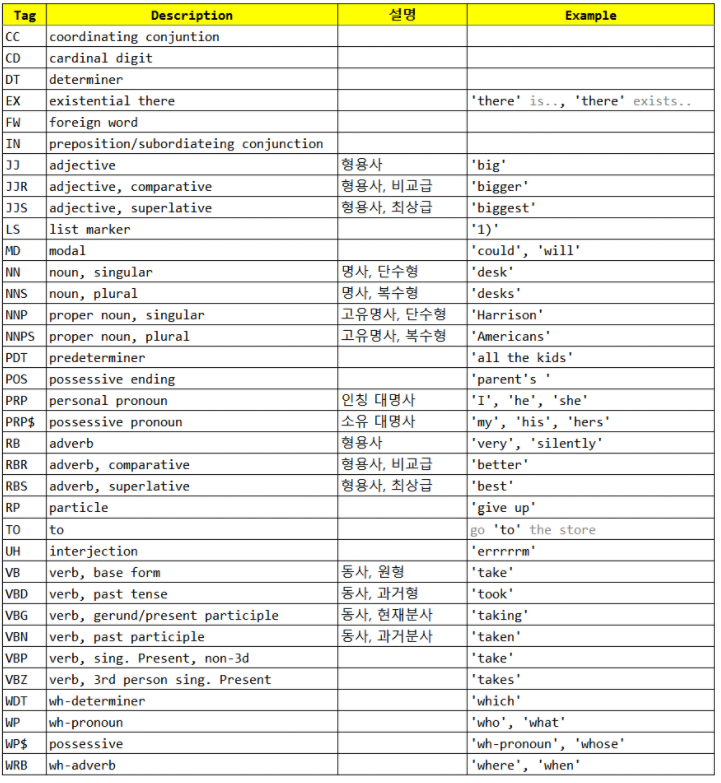

In [27]:
Image("C:/k_digital/source/data/word_eng.png")  ## 품사태그 설명

In [28]:
nouns_list = [t[0] for t in tag_list if t[1] == 'NN']
nouns_list

['handsome', 'clever', 'home', 'disposition', 'existence']

# 전처리

## 특수문자(특수기호) 제거

In [29]:
# 파이썬에 내장된 패키지 string은 문자열을 처리하는 다양한 함수를 제공한다.
import string

In [30]:
# 특수기호 목록 확인
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
sample = data['text'].loc[0]
sample

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [32]:
for i in sample:
    print(i)

G
o
 
u
n
t
i
l
 
j
u
r
o
n
g
 
p
o
i
n
t
,
 
c
r
a
z
y
.
.
 
A
v
a
i
l
a
b
l
e
 
o
n
l
y
 
i
n
 
b
u
g
i
s
 
n
 
g
r
e
a
t
 
w
o
r
l
d
 
l
a
 
e
 
b
u
f
f
e
t
.
.
.
 
C
i
n
e
 
t
h
e
r
e
 
g
o
t
 
a
m
o
r
e
 
w
a
t
.
.
.


In [33]:
for i in sample:
    if i not in string.punctuation:
        print(i)

G
o
 
u
n
t
i
l
 
j
u
r
o
n
g
 
p
o
i
n
t
 
c
r
a
z
y
 
A
v
a
i
l
a
b
l
e
 
o
n
l
y
 
i
n
 
b
u
g
i
s
 
n
 
g
r
e
a
t
 
w
o
r
l
d
 
l
a
 
e
 
b
u
f
f
e
t
 
C
i
n
e
 
t
h
e
r
e
 
g
o
t
 
a
m
o
r
e
 
w
a
t


In [34]:
new_text = []
for i in sample:
    if i not in string.punctuation:
        new_text.append(i)
        
new_text

['G',
 'o',
 ' ',
 'u',
 'n',
 't',
 'i',
 'l',
 ' ',
 'j',
 'u',
 'r',
 'o',
 'n',
 'g',
 ' ',
 'p',
 'o',
 'i',
 'n',
 't',
 ' ',
 'c',
 'r',
 'a',
 'z',
 'y',
 ' ',
 'A',
 'v',
 'a',
 'i',
 'l',
 'a',
 'b',
 'l',
 'e',
 ' ',
 'o',
 'n',
 'l',
 'y',
 ' ',
 'i',
 'n',
 ' ',
 'b',
 'u',
 'g',
 'i',
 's',
 ' ',
 'n',
 ' ',
 'g',
 'r',
 'e',
 'a',
 't',
 ' ',
 'w',
 'o',
 'r',
 'l',
 'd',
 ' ',
 'l',
 'a',
 ' ',
 'e',
 ' ',
 'b',
 'u',
 'f',
 'f',
 'e',
 't',
 ' ',
 'C',
 'i',
 'n',
 'e',
 ' ',
 't',
 'h',
 'e',
 'r',
 'e',
 ' ',
 'g',
 'o',
 't',
 ' ',
 'a',
 'm',
 'o',
 'r',
 'e',
 ' ',
 'w',
 'a',
 't']

In [35]:
s = ['a', 'p', 'p', 'l', 'e']
''.join(s)

'apple'

In [36]:
# 문장형태
new_sample = []
for i in sample:
    if i not in string.punctuation:
        new_sample.append(i)

new_sample = ''.join(new_sample)
new_sample

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [37]:
def remove_punc(x):
    new_sample = []
    for i in x:
        if i not in string.punctuation:
            new_sample.append(i)

    new_sample = ''.join(new_sample)
    return new_sample

In [38]:
sample

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [39]:
remove_punc(sample)

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [40]:
remove_punc(data['text'])

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...Ok lar... Joking wif u oni...Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'sU dun say so early hor... U c already then say...Nah I don\'t think he goes to usf, he lives around here thoughFreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, 짙1.50 to rcvEven my brother is not like to speak with me. They treat me like aids patent.As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends CallertuneWINNER!! As a valued network customer you have been selected to receivea 짙900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.Had your mobile 11 months or more? U R entitl

In [41]:
data['text'] = data['text'].apply(remove_punc)

In [42]:
data.head()

,target,text
0,ham,Go until jurong point crazy Available only in ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor U c already then say
4,ham,Nah I dont think he goes to usf he lives aroun...


## 전처리 - 불용어
- 불용어 : 자연어 푼설을 할 때 분석에 의미가 없는단어
- 불용어 사전 : nltk

In [43]:
# 불용어 목록 확인
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [45]:
stopwords.fileids()

['arabic',
 'azerbaijani',
 'basque',
 'bengali',
 'catalan',
 'chinese',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hebrew',
 'hinglish',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [46]:
sample = data['text'].loc[0]
sample

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [47]:
sample.split()

['Go',
 'until',
 'jurong',
 'point',
 'crazy',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'Cine',
 'there',
 'got',
 'amore',
 'wat']

In [48]:
new_sample = []
for w in sample.split():
    if w.lower() not in stopwords.words('english'): # 불용어가 아니라면
        new_sample.append(w.lower())
        
new_sample = ' '.join(new_sample)
new_sample

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [49]:
def stop_words(x):
    new_sample = []
    for w in x.split():
        if w.lower() not in stopwords.words('english'): # 불용어가 아니라면
            new_sample.append(w.lower())

    new_sample = ' '.join(new_sample)
    return new_sample

In [50]:
data['text'] = data['text'].apply(stop_words)
data['text']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4             nah dont think goes usf lives around though
                              ...                        
5569    2nd time tried 2 contact u u 짙750 pound prize ...
5570                          체 b going esplanade fr home
5571                          pity mood soany suggestions
5572    guy bitching acted like id interested buying s...
5573                                       rofl true name
Name: text, Length: 5574, dtype: object

## 전처리 - 정형화 처리(target)

In [51]:
sample = pd.Series(['a', 'b', 'c'])
# map()
# zip()
sample.map({'a':'apple', 'b':'banna', 'c':'candy'})

0    apple
1    banna
2    candy
dtype: object

In [52]:
data['target'] = data['target'].map({'spam' : 1, 'ham' : 0})
data['target']

0       0
1       0
2       1
3       0
4       0
       ..
5569    1
5570    0
5571    0
5572    0
5573    0
Name: target, Length: 5574, dtype: int64

## 카운트 기반의 벡터화 처리

- 카운트 기반 벡터화 : 문자를 개수 기반으로 벡터화하는 방식
- 데이터 전체에 존재하는 모든 단어들을 사전처럼 모은 다음에 각각의 인덱스를 부여하고, 문장마다 속한 단어가 있는 인덱스를 카운트 하는 방식이다.

In [53]:
X = data['text']
y = data['target']

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
# 객체 생성
cv = CountVectorizer()
# 모델 학습
cv.fit(X)
# 단어와 인덱스 출력
cv.vocabulary_

{'go': 3769,
 'jurong': 4671,
 'point': 6416,
 'crazy': 2471,
 'available': 1379,
 'bugis': 1848,
 'great': 3866,
 'world': 9171,
 'la': 4831,
 'buffet': 1846,
 'cine': 2186,
 'got': 3826,
 'amore': 1146,
 'wat': 8933,
 'ok': 5978,
 'lar': 4870,
 'joking': 4639,
 'wif': 9066,
 'oni': 6010,
 'free': 3555,
 'entry': 3137,
 'wkly': 9123,
 'comp': 2302,
 'win': 9080,
 'fa': 3274,
 'cup': 2527,
 'final': 3399,
 'tkts': 8366,
 '21st': 433,
 'may': 5318,
 '2005': 420,
 'text': 8201,
 '87121': 840,
 'receive': 6816,
 'questionstd': 6708,
 'txt': 8578,
 'ratetcs': 6760,
 'apply': 1232,
 '08452810075over18s': 71,
 'dun': 2988,
 'say': 7176,
 'early': 3008,
 'hor': 4200,
 'already': 1119,
 'nah': 5665,
 'dont': 2894,
 'think': 8277,
 'goes': 3783,
 'usf': 8727,
 'lives': 5033,
 'around': 1283,
 'though': 8296,
 'freemsg': 3563,
 'hey': 4095,
 'darling': 2591,
 'weeks': 8988,
 'word': 9157,
 'back': 1431,
 'id': 4321,
 'like': 4983,
 'fun': 3630,
 'still': 7843,
 'tb': 8131,
 'xxx': 9296,
 'std': 

In [55]:
X = cv.transform(X)
print(X)

  (0, 1146)	1
  (0, 1379)	1
  (0, 1846)	1
  (0, 1848)	1
  (0, 2186)	1
  (0, 2471)	1
  (0, 3769)	1
  (0, 3826)	1
  (0, 3866)	1
  (0, 4671)	1
  (0, 4831)	1
  (0, 6416)	1
  (0, 8933)	1
  (0, 9171)	1
  (1, 4639)	1
  (1, 4870)	1
  (1, 5978)	1
  (1, 6010)	1
  (1, 9066)	1
  (2, 71)	1
  (2, 420)	1
  (2, 433)	1
  (2, 840)	1
  (2, 1232)	1
  (2, 2302)	1
  :	:
  (5570, 3165)	1
  (5570, 3542)	1
  (5570, 3788)	1
  (5570, 4166)	1
  (5571, 5549)	1
  (5571, 6342)	1
  (5571, 7594)	1
  (5571, 7970)	1
  (5572, 964)	1
  (5572, 1632)	1
  (5572, 1883)	1
  (5572, 3080)	1
  (5572, 3555)	1
  (5572, 3679)	1
  (5572, 3928)	1
  (5572, 4321)	1
  (5572, 4458)	1
  (5572, 4983)	1
  (5572, 5760)	1
  (5572, 7619)	1
  (5572, 8717)	1
  (5572, 8983)	1
  (5573, 5671)	1
  (5573, 7036)	1
  (5573, 8524)	1


In [58]:
# 0번째 행의 데이터 확인
data.text[0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [59]:
print(cv.vocabulary_['go'])

3769


In [60]:
print(cv.vocabulary_['jurong'])

4671


# 모델링 및 예측/평가

## 훈련세트와 테스트세트로 분리

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

## MultinomialNB : 다항 분포에 대한 나이브 베이스 알고리즘

- 정규분포(Gaussian)
- 베르누이분포(Bernoulli)

In [68]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score  ## AUC 점수 함수


def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
#     roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
#     print('정확도 : {0:.3f}, 정밀도 : {1:.3f}, 재현율 : {2:.3f}, \
#     F1 : {3:.3f}, AUC : {4:.3f}'.format(accuracy, precision, recall, f1, roc_auc))
    
    print('정확도 : {0:.3f}, 정밀도 : {1:.3f}, 재현율 : {2:.3f}, \
    F1 : {3:.3f}'.format(accuracy, precision, recall, f1))

In [77]:
# data['target'] = data['target'].map({'spam' : 1, 'ham' : 0})

In [76]:
get_clf_eval(y_test, pred)

오차 행렬
[[965  12]
 [  4 134]]
정확도 : 0.986, 정밀도 : 0.918, 재현율 : 0.971,     F1 : 0.944


<AxesSubplot:>

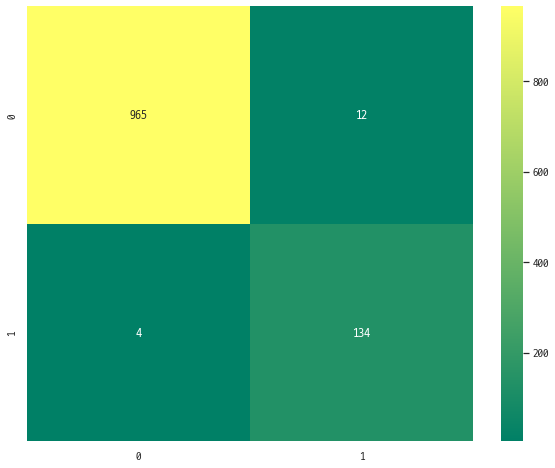

In [81]:
sns.heatmap(confusion_matrix(y_test, pred), annot= True, fmt = '0.0f', cmap ='summer')